In [27]:
import os
import sys
import numpy as np
import pandas as pd

sys.path.append('..')
from src.models.model import VSpyct

import torch
import pyro

In [28]:
import random

torch.manual_seed(0)
torch.cuda.manual_seed(0)  # Set seed for CUDA
random.seed(0)
np.random.seed(0)

In [30]:
max_depth = 5
minimum_examples_to_split = 2
epochs = 500
bs = 128
lr = 0.01
subspace_size = 1
device = 'cpu'

In [1882]:
import arff
import pandas as pd

with open('../../../../clus/data/str/ailerons/settings.ens.test.preds', 'r') as f:
    dataset = arff.load(f)

# Convert the data to a pandas DataFrame
df = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

In [1883]:
df.columns.tolist()

['goal', 'goal-pred', 'goal-stdev']

In [1884]:
preds = df[['goal-pred']].copy().values
true = df[['goal']].copy().values

In [1885]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, true)

0.0001330909090909091

In [1886]:
perf = ('PCT-Ensemble', mean_absolute_error(preds, true))

In [1887]:
perf

('PCT-Ensemble', 0.0001330909090909091)

In [1888]:
import pickle
with open ('../../../../clus/data/str/ailerons/pct_ensemble.pcl', 'wb') as fp:
  pickle.dump(perf, fp)

In [ ]:
# dolnive komentirani se za klasifikacija

In [1129]:
# import numpy as np
# preds = np.argmax(preds,axis=1)
# true = np.argmax(true,axis=1)

In [1130]:
# from sklearn.metrics import f1_score

# f1_score(preds, true, average='macro')

0.8970036967595527

In [1138]:
# perf = ('PCT-Ensemble', f1_score(preds, true, average='macro'))

In [1139]:
# import pickle
# with open ('../../../../clus/data/mcc/semeion/pct_ensemble.pcl', 'wb') as fp:
#   pickle.dump(perf, fp)

In [127]:
import arff
import pandas as pd

with open('../data/raw/final_datesets/mfeat_zernike_mcc.arff', 'r') as f:
    dataset = arff.load(f)
# Convert the data to a pandas DataFrame
df = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

# Shuffle the DataFrame if needed
df = df.sample(frac=1).reset_index(drop=True)

In [128]:
# from scipy.io import arff
# import pandas as pd

# df = pd.DataFrame(arff.loadarff('../data/raw/final_datesets/qsar234_str.arff')[0]).sample(frac=1).reset_index(drop=True)

In [129]:
df.shape

(2000, 48)

In [130]:
df.isna().sum()

att1     0
att2     0
att3     0
att4     0
att5     0
att6     0
att7     0
att8     0
att9     0
att10    0
att11    0
att12    0
att13    0
att14    0
att15    0
att16    0
att17    0
att18    0
att19    0
att20    0
att21    0
att22    0
att23    0
att24    0
att25    0
att26    0
att27    0
att28    0
att29    0
att30    0
att31    0
att32    0
att33    0
att34    0
att35    0
att36    0
att37    0
att38    0
att39    0
att40    0
att41    0
att42    0
att43    0
att44    0
att45    0
att46    0
att47    0
class    0
dtype: int64

In [131]:
# df['class'].unique()

In [132]:
df.head()


,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att39,att40,att41,att42,att43,att44,att45,att46,att47,class
0,0.061995,0.660853,21.303939,92.751866,156.775285,325.563053,250.434649,0.099621,2.823827,16.769494,...,62.880944,45.124882,2.101955,220.074761,271.571972,15.210667,51.885295,64.742045,478.419225,3
1,0.022235,0.436177,10.125818,60.690985,68.266964,192.474861,230.791060,0.145739,4.006051,35.560095,...,7.790595,105.357990,7.750090,153.902987,354.769893,1.999136,120.554575,45.770638,424.747402,10
2,0.139546,3.222566,26.857256,150.327931,95.461169,50.312995,78.669729,0.149686,1.981851,10.762193,...,32.855821,72.170565,18.848009,247.750561,602.462499,7.889384,49.695811,71.561504,662.454864,2
3,0.108075,2.972642,19.179127,45.023775,109.798463,248.823721,23.440075,0.165549,3.195142,22.555054,...,46.260870,181.278527,12.608268,188.839566,280.316205,11.628167,115.628885,56.783333,423.883199,4
4,0.094667,2.028851,34.128094,74.179898,143.996193,320.725539,244.842246,0.112939,3.300519,37.330522,...,30.373814,143.580548,6.308712,245.342206,295.960062,6.700917,83.981714,73.266376,494.365490,3


In [133]:
# df.classification = df.classification.apply(lambda x: x.replace('\t', '') if '\t' in x else x)

In [134]:
df.shape

(2000, 48)

In [135]:
target_col =  [df.columns[-1]]
# target_col = ['runtime']

In [136]:
# Select columns with dtype 'object'
object_columns = df.select_dtypes(include=['object']).columns

# Convert these columns to strings
df[object_columns] = df[object_columns].astype('str')

In [137]:
# select all columns in object_columns except the target_col

categorical_columns = object_columns[~object_columns.isin(target_col)]

In [138]:
categorical_columns

Index([], dtype='object')

In [139]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the data
encoded_array = encoder.fit_transform(df[categorical_columns])

# Get the new column names
encoded_cols = encoder.get_feature_names_out(categorical_columns)

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols)

# Combine with the original DataFrame (excluding the object columns)
df = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

/Users/viktorandonovic/miniconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [140]:
df

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att39,att40,att41,att42,att43,att44,att45,att46,att47,class
0,0.061995,0.660853,21.303939,92.751866,156.775285,325.563053,250.434649,0.099621,2.823827,16.769494,...,62.880944,45.124882,2.101955,220.074761,271.571972,15.210667,51.885295,64.742045,478.419225,3
1,0.022235,0.436177,10.125818,60.690985,68.266964,192.474861,230.791060,0.145739,4.006051,35.560095,...,7.790595,105.357990,7.750090,153.902987,354.769893,1.999136,120.554575,45.770638,424.747402,10
2,0.139546,3.222566,26.857256,150.327931,95.461169,50.312995,78.669729,0.149686,1.981851,10.762193,...,32.855821,72.170565,18.848009,247.750561,602.462499,7.889384,49.695811,71.561504,662.454864,2
3,0.108075,2.972642,19.179127,45.023775,109.798463,248.823721,23.440075,0.165549,3.195142,22.555054,...,46.260870,181.278527,12.608268,188.839566,280.316205,11.628167,115.628885,56.783333,423.883199,4
4,0.094667,2.028851,34.128094,74.179898,143.996193,320.725539,244.842246,0.112939,3.300519,37.330522,...,30.373814,143.580548,6.308712,245.342206,295.960062,6.700917,83.981714,73.266376,494.365490,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.035010,0.814535,11.861539,22.089657,132.340920,148.826888,35.123171,0.094411,1.228497,16.184244,...,46.565737,12.665984,8.058167,216.423163,630.731909,10.936171,15.133099,59.685611,664.024662,2
1996,0.062550,0.909402,15.474280,60.313797,132.607623,350.551583,19.766134,0.103173,2.338209,38.524704,...,24.834979,74.864752,4.626245,147.890063,561.535367,5.293881,65.306794,42.383152,599.182814,6
1997,0.064634,1.604528,26.124081,108.935594,184.240039,467.874929,112.339097,0.108539,1.296012,9.274065,...,24.786985,20.021742,6.689728,179.432861,362.045619,6.459546,6.345730,55.648277,545.135389,9
1998,0.029815,1.056020,11.512475,49.991791,58.963801,400.800590,294.633955,0.010716,0.667758,7.678159,...,14.444975,15.712260,6.631859,163.206568,521.521965,3.745301,6.492354,47.078827,623.637504,1


In [141]:
non_target_columns = df.columns[~df.columns.isin(target_col)]
df[non_target_columns] = df[non_target_columns].apply(lambda x: x.fillna(x.mean()), axis=0)

In [142]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Separate target columns from the features
features = df.drop(columns=target_col)
target = df[target_col]

# Apply Min-Max Scaling (or any other normalization) to the features only
scaler = MinMaxScaler()
features_normalized = pd.DataFrame(scaler.fit_transform(features), columns=features.columns, index=features.index)

# Combine the normalized features with the target column
df = pd.concat([features_normalized.reset_index(drop=True), target.reset_index(drop=True)], axis=1)

In [143]:
df

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att39,att40,att41,att42,att43,att44,att45,att46,att47,class
0,0.122846,0.067350,0.290502,0.456395,0.544652,0.576745,0.540700,0.154629,0.210869,0.176014,...,0.394988,0.151782,0.072248,0.679290,0.264607,0.383791,0.234418,0.646507,0.342802,3
1,0.042644,0.043272,0.135420,0.294731,0.229481,0.339563,0.498281,0.228240,0.301522,0.380056,...,0.047163,0.359476,0.305328,0.402705,0.400140,0.042294,0.549235,0.372645,0.225006,10
2,0.279280,0.341876,0.367547,0.746718,0.326317,0.086211,0.169784,0.234540,0.146306,0.110783,...,0.205418,0.245040,0.763302,0.794970,0.803642,0.194547,0.224380,0.744950,0.746712,2
3,0.215797,0.315093,0.261023,0.215730,0.377371,0.439985,0.050519,0.259858,0.239342,0.238838,...,0.290053,0.621264,0.505809,0.548733,0.278852,0.291189,0.526653,0.531619,0.223109,4
4,0.188752,0.213952,0.468421,0.362747,0.499147,0.568124,0.528624,0.175885,0.247422,0.399280,...,0.189747,0.491275,0.245847,0.784903,0.304336,0.163827,0.381565,0.769561,0.377800,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.068413,0.083819,0.159501,0.100086,0.457643,0.261777,0.075748,0.146312,0.088539,0.169659,...,0.291978,0.039857,0.318041,0.664027,0.849694,0.273302,0.065926,0.573515,0.750157,2
1996,0.123967,0.093986,0.209623,0.292829,0.458593,0.621278,0.042585,0.160297,0.173632,0.412247,...,0.154777,0.254330,0.176417,0.377572,0.736970,0.127458,0.295949,0.323744,0.607846,6
1997,0.128170,0.168479,0.357375,0.538001,0.642452,0.830364,0.242491,0.168862,0.093716,0.094624,...,0.154474,0.065221,0.261570,0.509415,0.411993,0.157588,0.025640,0.515234,0.489226,9
1998,0.057934,0.109698,0.154658,0.240781,0.196353,0.710829,0.636146,0.012722,0.045542,0.077294,...,0.089177,0.050361,0.259182,0.441592,0.671787,0.087429,0.026312,0.391529,0.661518,1


In [144]:
# y = df[target_col]
# from sklearn.preprocessing import LabelEncoder

# # Initialize the LabelEncoder
# label_encoder = LabelEncoder()

# # Fit and transform the y DataFrame
# y = y.astype('str').apply(label_encoder.fit_transform).values.reshape(-1, 1)

# from sklearn.preprocessing import OneHotEncoder

# # For multi-class datasets, target needs to be one-hot encoded.
# encoder = OneHotEncoder()
# y = encoder.fit_transform(y).toarray()

# # drop urban and append y but make the name of the columns of y be string

# df = df.drop(columns=target_col)
# df = pd.concat([df, pd.DataFrame(y, columns=[f'{target_col[0]}_{i}' for i in range(y.shape[1])])], axis=1)

# # Display the encoded y DataFrame
# print(y.shape)

In [145]:
# import numpy as np

# # Calculate the number of new columns (30% of current columns)
# num_existing_columns = len(df.columns)
# num_new_columns = int(np.ceil(num_existing_columns))

# # Generate new random columns
# for i in range(num_new_columns):
#     new_col_name = f'Random_{i+1}'
#     df[new_col_name] = np.random.normal(loc=0, scale=1, size=len(df))  # Mean=0, StdDev=1


In [146]:
df

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att39,att40,att41,att42,att43,att44,att45,att46,att47,class
0,0.122846,0.067350,0.290502,0.456395,0.544652,0.576745,0.540700,0.154629,0.210869,0.176014,...,0.394988,0.151782,0.072248,0.679290,0.264607,0.383791,0.234418,0.646507,0.342802,3
1,0.042644,0.043272,0.135420,0.294731,0.229481,0.339563,0.498281,0.228240,0.301522,0.380056,...,0.047163,0.359476,0.305328,0.402705,0.400140,0.042294,0.549235,0.372645,0.225006,10
2,0.279280,0.341876,0.367547,0.746718,0.326317,0.086211,0.169784,0.234540,0.146306,0.110783,...,0.205418,0.245040,0.763302,0.794970,0.803642,0.194547,0.224380,0.744950,0.746712,2
3,0.215797,0.315093,0.261023,0.215730,0.377371,0.439985,0.050519,0.259858,0.239342,0.238838,...,0.290053,0.621264,0.505809,0.548733,0.278852,0.291189,0.526653,0.531619,0.223109,4
4,0.188752,0.213952,0.468421,0.362747,0.499147,0.568124,0.528624,0.175885,0.247422,0.399280,...,0.189747,0.491275,0.245847,0.784903,0.304336,0.163827,0.381565,0.769561,0.377800,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.068413,0.083819,0.159501,0.100086,0.457643,0.261777,0.075748,0.146312,0.088539,0.169659,...,0.291978,0.039857,0.318041,0.664027,0.849694,0.273302,0.065926,0.573515,0.750157,2
1996,0.123967,0.093986,0.209623,0.292829,0.458593,0.621278,0.042585,0.160297,0.173632,0.412247,...,0.154777,0.254330,0.176417,0.377572,0.736970,0.127458,0.295949,0.323744,0.607846,6
1997,0.128170,0.168479,0.357375,0.538001,0.642452,0.830364,0.242491,0.168862,0.093716,0.094624,...,0.154474,0.065221,0.261570,0.509415,0.411993,0.157588,0.025640,0.515234,0.489226,9
1998,0.057934,0.109698,0.154658,0.240781,0.196353,0.710829,0.636146,0.012722,0.045542,0.077294,...,0.089177,0.050361,0.259182,0.441592,0.671787,0.087429,0.026312,0.391529,0.661518,1


In [147]:
X = df.drop(columns=target_col)
y = df[target_col]

In [148]:
# # # ignore this for regression problems

from sklearn.preprocessing import OneHotEncoder

# For multi-class datasets, target needs to be one-hot encoded.
encoder = OneHotEncoder()
y = encoder.fit_transform(y).toarray()

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [150]:
import pickle

# save X_train, X_test, y_train, y_test to pickle

with open('../mfeat_zernike_mcc_files.pcl', 'wb') as f:
    pickle.dump((X_train, X_test, y_train, y_test), f)

In [122]:
import pickle

with open('../credit-g_bc_feat_imp.pcl', 'wb') as f:
    pickle.dump(feature_importance_zernike, f)

In [ ]:
import pickle
import torch
from sklearn.metrics import mean_absolute_error

# --- Hyperparams / Setup ---
max_depth = 5
minimum_examples_to_split = 2
epochs = 500
bs = 128
lr = 0.01
subspace_size = 1
device = 'cpu'

# --- Load data ---
with open('cpmp2015_str_files.pcl', 'rb') as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

with open('cpmp2015_str_feat_imp.pcl', 'rb') as f:
    feature_importance_scores = pickle.load(f)

feature_names = X_train.columns.tolist()
features_dict = dict(zip(feature_names, feature_importance_scores))

# Sort features by importance ascending so that
# the "least important" feature is first.
sorted_features_least_first = sorted(features_dict, key=features_dict.get)

# --- Define a helper function to train & evaluate ---
def train_and_evaluate_model(X_train, y_train, X_test, y_test, features):
    """
    Subset the training/test data to the given 'features',
    train the VSpyct model, and return the mean_absolute_error on test.
    """
    # Subset columns
    X_train_sub = X_train[features]
    X_test_sub = X_test[features]
    
    # Initialize model
    vspyct = VSpyct(
        bs=bs,
        max_depth=max_depth,
        epochs=epochs,
        lr=lr,
        minimum_examples_to_split=minimum_examples_to_split
    )
    
    # Fit
    vspyct.fit(torch.Tensor(X_train_sub.values), torch.Tensor(y_train.values))
    
    # Predict
    vspyct_preds = vspyct.predict(torch.Tensor(X_test_sub.values))
    vspyct_preds_mean = vspyct_preds.mean(axis=1).numpy()
    
    # Score
    score = mean_absolute_error(y_test.values, vspyct_preds_mean)
    return score

# --- 1) Baseline score with ALL features ---
current_feature_set = list(feature_names)  # start with all features
baseline_score = train_and_evaluate_model(X_train, y_train, X_test, y_test, current_feature_set)
print(f"Baseline MAE: {baseline_score:.4f}")

removed_features = []
scores = [baseline_score]  # keep track of scores at each step

# --- 2) Iteratively remove the least important feature ---
for f in sorted_features_least_first:
    # Create a candidate set that removes 'f'
    candidate_feature_set = [feat for feat in current_feature_set if feat != f]
    
    # Train & evaluate
    candidate_score = train_and_evaluate_model(
        X_train, y_train, 
        X_test, y_test, 
        candidate_feature_set
    )
    
    # Check if removing this feature degrades performance by >10% 
    # i.e. if MAE is 10% higher than the initial baseline
    if candidate_score > baseline_score * 1.10:
        print(
            f"Stopping: Removing '{f}' increases MAE "
            f"by more than 10% of baseline. "
            f"(Candidate MAE: {candidate_score:.4f})"
        )
        break
    else:
        current_feature_set = candidate_feature_set
        removed_features.append(f)
        scores.append(candidate_score)
        print(f"Removed '{f}'; new MAE = {candidate_score:.4f}")

# print("\nSummary:")
# print(f"Features removed: {removed_features}")
# print(f"Remaining features: {current_feature_set}")
# print(f"Number of remaining features: {len(current_feature_set)}")
# print(f"MAE at each step: {scores}")

# --- 3) Save removed features, remaining features, 
# and the ratio of least vs. most important remaining feature ---

# Get importance of the least and most important features in the final set
remaining_importances = [features_dict[feat] for feat in current_feature_set]
lowest_importance = min(remaining_importances)
highest_importance = max(remaining_importances)
importance_ratio = lowest_importance / highest_importance  # float

with open('removed_features.pkl', 'wb') as f:
    pickle.dump(removed_features, f)

with open('remaining_features.pkl', 'wb') as f:
    pickle.dump(current_feature_set, f)

with open('importance_ratio.pkl', 'wb') as f:
    pickle.dump(importance_ratio, f)

print(f"\nSaved pickle files:")
print(f" - removed_features.pkl")
print(f" - remaining_features.pkl")
print(f" - importance_ratio.pkl (value = {importance_ratio:.4f})")


In [100]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)

In [65]:
import arff

# Convert DataFrame to ARFF format
def dataframe_to_arff(df, file_path, relation_name="relation"):
    attributes = []
    for col in df.columns:
        if df[col].dtype.kind in "biufc":  # Numeric
            attributes.append((col, "NUMERIC"))
        elif df[col].dtype.kind == "O":  # Object/String
            attributes.append((col, "STRING"))
        elif df[col].dtype.name == "category":  # Categorical
            attributes.append((col, df[col].cat.categories.tolist()))
    
    arff_data = {
        "relation": relation_name,
        "attributes": attributes,
        "data": df.values.tolist(),
    }

    # Write ARFF file
    with open(file_path, "w") as f:
        arff.dump(arff_data, f)

In [1872]:
# Save to ARFF file
dataframe_to_arff(train, '../../../../clus/data/str/ailerons/ailerons_train.arff', relation_name="example")
dataframe_to_arff(test, '../../../../clus/data/str/ailerons/ailerons_test.arff', relation_name="example")

In [131]:
X = df.drop(columns=target_col).values

# for regression tasks, we can directly use the target column
y = df[target_col].values.reshape(-1, 1)


# # for classification tasks, we need to encode the target column

# y = df[target_col]
# from sklearn.preprocessing import LabelEncoder

# # Initialize the LabelEncoder
# label_encoder = LabelEncoder()

# # Fit and transform the y DataFrame
# y = y.apply(label_encoder.fit_transform).values.reshape(-1, 1)

# # Display the encoded y DataFrame
# print(y.shape)

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

In [111]:
# # # ignore this for regression problems

from sklearn.preprocessing import OneHotEncoder

# For multi-class datasets, target needs to be one-hot encoded.
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train).toarray()

In [112]:
import torch
torch.tensor(y_train)

tensor([[0., 1.],
        [0., 1.],
        [0., 1.],
        ...,
        [0., 1.],
        [1., 0.],
        [0., 1.]], dtype=torch.float64)

In [113]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
torch.tensor(scaler.fit_transform(y_train))
scaler.inverse_transform(torch.tensor(scaler.fit_transform(y_train)))

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [114]:
from spyct import Model

ensemble_spyct = Model(num_trees=10)
single_spyct = Model(num_trees=1)

single_spyct.fit(X_train, y_train)
ensemble_spyct.fit(X_train, y_train)

In [115]:
torch.Tensor(X_train).shape, torch.Tensor(y_train).shape

(torch.Size([800, 61]), torch.Size([800, 2]))

In [116]:
vspyct = VSpyct(bs=bs, max_depth=max_depth, epochs=epochs, lr=lr, minimum_examples_to_split=minimum_examples_to_split)
vspyct.fit(torch.Tensor(X_train), torch.Tensor(y_train))

Total variance: 4209.96875


Epochs:  57%|█████▋    | 287/500 [00:08<00:06, 35.26it/s]


Early stopping at epoch 287.
Impurity(
  (linear): PyroLinear(in_features=61, out_features=1, bias=True)
)
Rows left:  torch.Size([323]) Var left tensor(4685.5625)
Rows right:  torch.Size([477]) Var right tensor(1501.5228)


Epochs: 100%|██████████| 500/500 [00:08<00:00, 61.53it/s]


Impurity(
  (linear): PyroLinear(in_features=61, out_features=1, bias=True)
)
Rows left:  torch.Size([36]) Var left tensor(4938.2715)
Rows right:  torch.Size([441]) Var right tensor(988.6827)


Epochs: 100%|██████████| 500/500 [00:08<00:00, 61.80it/s]


Impurity(
  (linear): PyroLinear(in_features=61, out_features=1, bias=True)
)
Rows left:  torch.Size([379]) Var left tensor(711.4960)
Rows right:  torch.Size([62]) Var right tensor(2481.7898)


Epochs:  66%|██████▌   | 330/500 [00:01<00:00, 245.01it/s]


Early stopping at epoch 330.
Impurity(
  (linear): PyroLinear(in_features=61, out_features=1, bias=True)
)
Rows left:  torch.Size([5]) Var left tensor(0.)
Rows right:  torch.Size([57]) Var right tensor(1305.0171)


Epochs:  60%|█████▉    | 298/500 [00:01<00:00, 246.88it/s]


Early stopping at epoch 298.
Impurity(
  (linear): PyroLinear(in_features=61, out_features=1, bias=True)
)
Rows left:  torch.Size([4]) Var left tensor(0.)
Rows right:  torch.Size([53]) Var right tensor(0.)


Epochs: 100%|██████████| 500/500 [00:06<00:00, 81.22it/s]


Impurity(
  (linear): PyroLinear(in_features=61, out_features=1, bias=True)
)
Rows left:  torch.Size([339]) Var left tensor(175.4249)
Rows right:  torch.Size([40]) Var right tensor(3987.5000)


Epochs:  34%|███▍      | 170/500 [00:00<00:01, 243.29it/s]


Early stopping at epoch 170.
Impurity(
  (linear): PyroLinear(in_features=61, out_features=1, bias=True)
)
Rows left:  torch.Size([33]) Var left tensor(2130.3948)
Rows right:  torch.Size([7]) Var right tensor(0.)


Epochs:  41%|████      | 203/500 [00:02<00:03, 78.74it/s]


Early stopping at epoch 203.
Impurity(
  (linear): PyroLinear(in_features=61, out_features=1, bias=True)
)
Rows left:  torch.Size([4]) Var left tensor(5000.)
Rows right:  torch.Size([335]) Var right tensor(59.5233)


Epochs:  57%|█████▋    | 286/500 [00:01<00:00, 245.28it/s]


Early stopping at epoch 286.
Impurity(
  (linear): PyroLinear(in_features=61, out_features=1, bias=True)
)
Rows left:  torch.Size([17]) Var left tensor(0.)
Rows right:  torch.Size([19]) Var right tensor(2659.2800)


Epochs:  73%|███████▎  | 367/500 [00:01<00:00, 245.71it/s]


Early stopping at epoch 367.
Impurity(
  (linear): PyroLinear(in_features=61, out_features=1, bias=True)
)
Rows left:  torch.Size([15]) Var left tensor(0.)
Rows right:  torch.Size([4]) Var right tensor(3750.)


Epochs:  14%|█▍        | 72/500 [00:00<00:02, 201.53it/s]


Early stopping at epoch 72.
Impurity(
  (linear): PyroLinear(in_features=61, out_features=1, bias=True)
)
Rows left:  torch.Size([2]) Var left tensor(0.)
Rows right:  torch.Size([2]) Var right tensor(5000.)


Epochs: 100%|██████████| 500/500 [00:06<00:00, 82.37it/s]


Impurity(
  (linear): PyroLinear(in_features=61, out_features=1, bias=True)
)
Rows left:  torch.Size([238]) Var left tensor(4462.9609)
Rows right:  torch.Size([85]) Var right tensor(4993.7715)


Epochs:  82%|████████▏ | 411/500 [00:01<00:00, 236.63it/s]


Early stopping at epoch 411.
Impurity(
  (linear): PyroLinear(in_features=61, out_features=1, bias=True)
)
Rows left:  torch.Size([66]) Var left tensor(4444.4453)
Rows right:  torch.Size([19]) Var right tensor(0.)


Epochs: 100%|██████████| 500/500 [00:02<00:00, 244.75it/s]


Impurity(
  (linear): PyroLinear(in_features=61, out_features=1, bias=True)
)
Rows left:  torch.Size([22]) Var left tensor(2975.2068)
Rows right:  torch.Size([44]) Var right tensor(1652.8925)


Epochs:  57%|█████▋    | 285/500 [00:01<00:00, 243.79it/s]


Early stopping at epoch 285.
Impurity(
  (linear): PyroLinear(in_features=61, out_features=1, bias=True)
)
Rows left:  torch.Size([40]) Var left tensor(0.)
Rows right:  torch.Size([4]) Var right tensor(0.)


Epochs:  37%|███▋      | 183/500 [00:00<00:01, 242.65it/s]


Early stopping at epoch 183.
Impurity(
  (linear): PyroLinear(in_features=61, out_features=1, bias=True)
)
Rows left:  torch.Size([18]) Var left tensor(0.)
Rows right:  torch.Size([4]) Var right tensor(0.)


Epochs: 100%|██████████| 500/500 [00:04<00:00, 118.66it/s]


Impurity(
  (linear): PyroLinear(in_features=61, out_features=1, bias=True)
)
Rows left:  torch.Size([170]) Var left tensor(2906.5742)
Rows right:  torch.Size([68]) Var right tensor(3892.7329)


Epochs:  59%|█████▊    | 293/500 [00:01<00:00, 242.38it/s]


Early stopping at epoch 293.
Impurity(
  (linear): PyroLinear(in_features=61, out_features=1, bias=True)
)
Rows left:  torch.Size([56]) Var left tensor(1913.2656)
Rows right:  torch.Size([12]) Var right tensor(0.)


Epochs:  55%|█████▍    | 274/500 [00:01<00:00, 230.78it/s]


Early stopping at epoch 274.
Impurity(
  (linear): PyroLinear(in_features=61, out_features=1, bias=True)
)
Rows left:  torch.Size([7]) Var left tensor(2448.9800)
Rows right:  torch.Size([49]) Var right tensor(0.)


Epochs: 100%|██████████| 500/500 [00:04<00:00, 121.77it/s]


Impurity(
  (linear): PyroLinear(in_features=61, out_features=1, bias=True)
)
Rows left:  torch.Size([119]) Var left tensor(649.6717)
Rows right:  torch.Size([51]) Var right tensor(4998.0771)


Epochs:  98%|█████████▊| 491/500 [00:02<00:00, 235.74it/s]


Early stopping at epoch 491.
Impurity(
  (linear): PyroLinear(in_features=61, out_features=1, bias=True)
)
Rows left:  torch.Size([18]) Var left tensor(0.)
Rows right:  torch.Size([33]) Var right tensor(3673.0950)


Epochs:  57%|█████▋    | 286/500 [00:01<00:00, 240.31it/s]

Early stopping at epoch 286.
Impurity(
  (linear): PyroLinear(in_features=61, out_features=1, bias=True)
)
Rows left:  torch.Size([115]) Var left tensor(0.)
Rows right:  torch.Size([4]) Var right tensor(0.)


In [117]:
feature_importance_zernike = vspyct.feature_importances().tolist()

In [121]:
feature_importance_zernike

[6393.080078125,
 8482.6162109375,
 2321.213134765625,
 5306.78369140625,
 6122.31103515625,
 3127.063232421875,
 1752.3216552734375,
 5754.32177734375,
 8268.7265625,
 3458.577880859375,
 7549.22216796875,
 5399.2822265625,
 1586.3597412109375,
 5096.0556640625,
 4760.43359375,
 5013.951171875,
 6298.63427734375,
 1045.015869140625,
 2572.343017578125,
 3037.48681640625,
 1588.8939208984375,
 2503.123046875,
 7772.66650390625,
 2116.361328125,
 1020.0994873046875,
 2372.88916015625,
 4233.283203125,
 1718.9951171875,
 1745.2069091796875,
 2979.248291015625,
 1697.5673828125,
 5514.3486328125,
 11787.7685546875,
 9246.966796875,
 7022.45703125,
 1969.7513427734375,
 6142.14697265625,
 2048.986083984375,
 1868.3360595703125,
 8752.142578125,
 3055.438720703125,
 31.843135833740234,
 4526.3505859375,
 3893.697509765625,
 1281.022216796875,
 3707.260498046875,
 3227.6875,
 5603.615234375,
 1500.219970703125,
 5049.947265625,
 2066.867431640625,
 4666.99169921875,
 6940.498046875,
 1312.48

In [243]:
dct = dict(zip(X.columns.tolist(), vspyct.feature_importances().tolist()))

In [244]:

random_cols = [col for col in list(dct.keys()) if 'Random' in col]
other_cols = [col for col in list(dct.keys()) if col not in random_cols]

In [245]:
# for k,v in dct.items():
#   if k in random_cols:
#     dct[k] = 0.7*dct[k]

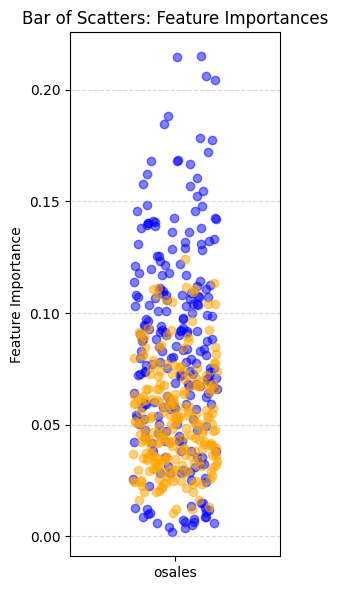

In [246]:
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=8)
plt.figure(figsize=(6, 5))

# Combine all columns into a single vertical column of scatter points
all_cols = other_cols + random_cols
all_vals = [dct[col] for col in all_cols]
all_colors = ['orange' if col in random_cols else 'blue' for col in all_cols]
all_jitter = np.random.uniform(-0.2, 0.2, size=len(all_cols))  # Add slight horizontal jitter for visual separation

# Plot scatter points
for i, (val, color) in enumerate(zip(all_vals, all_colors)):
    plt.scatter(0 + all_jitter[i], val, color=color, alpha=0.5)

# Enhance plot
plt.title("Bar of Scatters: Feature Importances")
plt.ylabel("Feature Importance")
plt.xticks([0], ["osales"])
plt.xlim(-0.5, 0.5)
# plt.legend(handles=[
#     plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', alpha=0.5, label='Random Columns'),
#     plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', alpha=0.5, label='Other Columns')
# ])
plt.tight_layout()
plt.savefig('../reports/figures/feat_importances.pdf')

In [247]:
# Normalizing the dictionary values to sum to 1
total = sum(dct.values())
normalized_dct = {key: value / total for key, value in dct.items()}

In [248]:
import pickle

with open ('../data/processed/chronic_kidney_disease_importances.pcl', 'wb') as fp:
  pickle.dump(normalized_dct, fp)

In [1916]:
vspyct.root_node.losses

[7492454760588.799,
 7464103379993.603,
 7360092662105.6,
 7122000766886.4,
 6709420533939.2,
 6219544600447.999,
 5727608160192.001,
 5330129076518.399,
 4997347467481.6,
 4741272050790.401,
 4516260453990.399,
 4337770778380.8,
 4188780558809.6,
 4055752735398.399,
 3942516908211.199,
 3842575097369.601,
 3751665451033.599,
 3672261796095.999,
 3602709466828.799,
 3535955740774.3994,
 3478791257958.4,
 3423820036947.199,
 3375172500063.9995,
 3329637501292.8003,
 3288073813631.9995,
 3247983700959.9995,
 3214137047788.8003,
 3177860910188.8013,
 3146336415724.8003,
 3116329935673.6,
 3087533205580.8003,
 3061069996224.001,
 3035899862982.401,
 3011823132799.999,
 2989288231296.0,
 2967541682950.4004,
 2948289767187.1997,
 2927431382003.2007,
 2909441953222.4004,
 2892925087136.0,
 2874845335347.1997,
 2858805313062.401,
 2842958273606.401,
 2828887513324.7993,
 2814172990476.8,
 2799932030572.7993,
 2787203647142.4,
 2774036224371.1997,
 2761629470214.3994,
 2750598480371.2,
 2738214

In [1917]:
from sklearn.metrics import mean_absolute_error

In [80]:
vspyct_preds = vspyct.predict(torch.Tensor(X_test))

In [81]:
vspyct_preds_mean = vspyct_preds.mean(axis=1).numpy()

In [82]:
# for classification

vsp_preds = np.argmax(vspyct_preds.mean(axis=1).numpy(),axis=1)

In [83]:
single_spyct_preds = single_spyct.predict(X_test)

In [84]:
ensemble_spyct_preds = ensemble_spyct.predict(X_test)

In [85]:
# for classification

single_spyct_preds = np.argmax(single_spyct_preds,axis=1)
ensemble_spyct_preds = np.argmax(ensemble_spyct_preds,axis=1)

In [924]:
# np.sum(np.argmax(ensemble_spyct_preds,axis=1) == np.argmax(encoder.transform(y_test).toarray(),axis=1))

In [87]:
# for classification

y_test_f1 = np.argmax(encoder.transform(y_test).toarray(),axis=1)

In [893]:
# import matplotlib.pyplot as plt
# vsp_preds = (vspyct_preds.mean(axis=1)>=0.5).to(torch.int32).numpy()
# sing_preds = (single_spyct.predict(X_test)>=0.5).astype(int)
# ens_preds = (ensemble_spyct.predict(X_test)>=0.5).astype(int)

# plt.plot(y_test)

In [1922]:
vspyct_preds_mean.shape, single_spyct_preds.shape

((1639, 1), (1639, 1))

In [1923]:
mean_absolute_error(y_test, vspyct_preds_mean), mean_absolute_error(y_test, single_spyct_preds), mean_absolute_error(y_test, ensemble_spyct_preds)

(2.7116777454818934, 2.795463140270826, 2.6322416518570284)

In [1423]:
single_spyct_preds, y_test

(array([[620.     ],
        [620.     ],
        [679.25   ],
        ...,
        [750.8173 ],
        [750.8173 ],
        [291.10236]], dtype=float32),
 array([[5343],
        [5671],
        [2671],
        ...,
        [ 668],
        [2213],
        [8168]]))

In [121]:
ensemble_spyct_preds

array([11,  6, 22, ..., 11,  6, 14])

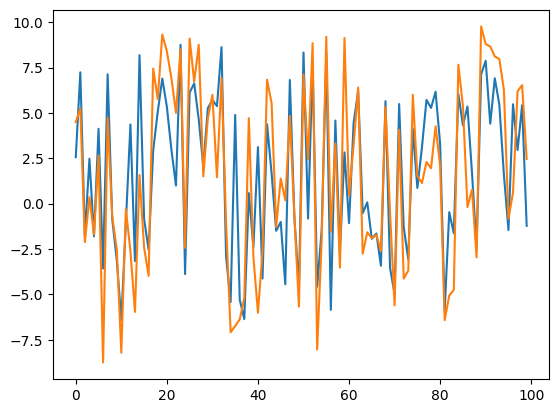

In [1439]:
plt.plot(preds[:100])
plt.plot(true[:100])

In [1550]:
y_test

array([[-3.646181],
       [ 4.759357],
       [ 7.716711],
       ...,
       [ 6.81134 ],
       [ 4.354505],
       [ 0.120191]])

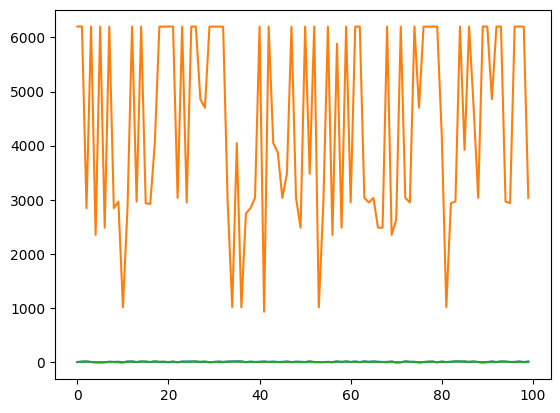

In [1549]:
import matplotlib.pyplot as plt

plt.plot(y_test[:100])
plt.plot(vspyct_preds_mean[:100])
# plt.plot(single_spyct_preds[:100])
plt.plot(ensemble_spyct_preds[:100])

In [1320]:
import os

os.makedirs('../final_results/str', exist_ok=True)

In [1924]:
vspyct_mae = mean_absolute_error(y_test, vspyct_preds_mean)
single_spyct_mae = mean_absolute_error(y_test, single_spyct_preds)
ensemble_spyct_mae = mean_absolute_error(y_test, ensemble_spyct_preds)

In [1322]:
# Example performance data across 3 datasets
performance_data = [
    [('Alg1', 0.75), ('Alg2', 0.65), ('Alg3', 0.80)],  # Dataset 1
    [('Alg1', 0.70), ('Alg2', 0.60), ('Alg3', 0.85)],  # Dataset 2
    [('Alg1', 0.80), ('Alg2', 0.70), ('Alg3', 0.78)],  # Dataset 3
]

In [1925]:
performance = [('vspyct', vspyct_mae), ('spyct_single', single_spyct_mae), ('spyct_ensemble', ensemble_spyct_mae)]

In [1926]:
performance

[('vspyct', 2.7116777454818934),
 ('spyct_single', 2.795463140270826),
 ('spyct_ensemble', 2.6322416518570284)]

In [1927]:
# save as pickle
import pickle

with open('../final_results/str/puma8NH.pcl', 'wb') as f:
    pickle.dump(performance, f)

In [42]:
# import pickle
# from sklearn.metrics import f1_score

# with open('../diabetes_f1_vspyct.pcl', 'wb') as f:
#   pickle.dump(f1_score(vsp_preds, y_test), f)

# with open('../diabetes_f1_spyct_single.pcl', 'wb') as f:
#   pickle.dump(f1_score(sing_preds, y_test), f)

# with open('../diabetes_f1_spyct_ensemble.pcl', 'wb') as f:
#   pickle.dump(f1_score(ens_preds, y_test), f)

In [699]:
y_test_f1

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1])

In [88]:
from sklearn.metrics import f1_score

f1_score(vsp_preds, y_test_f1, average='macro'), f1_score(single_spyct_preds, y_test_f1, average='macro'), f1_score(ensemble_spyct_preds, y_test_f1, average='macro')

(0.9729546991210277, 0.9725274725274725, 1.0)

In [927]:
performance = [('vspyct', f1_score(vsp_preds, y_test_f1, average='macro')), ('spyct_single', f1_score(single_spyct_preds, y_test_f1, average='macro')), ('spyct_ensemble', f1_score(ensemble_spyct_preds, y_test_f1, average='macro'))]

In [928]:
performance

[('vspyct', 0.47100488804104085),
 ('spyct_single', 0.4433450865644344),
 ('spyct_ensemble', 0.5358243339907269)]

In [929]:
# save as pickle
import pickle
import os

os.makedirs('../final_results/mcc', exist_ok=True)
with open('../final_results/mcc/yeast.pcl', 'wb') as f:
    pickle.dump(performance, f)

In [19]:
# import matplotlib.pyplot as plt
# plt.plot(np.array(ensemble_spyct.predict(X_test)>=0.5).astype(int))
# plt.plot(y_test)

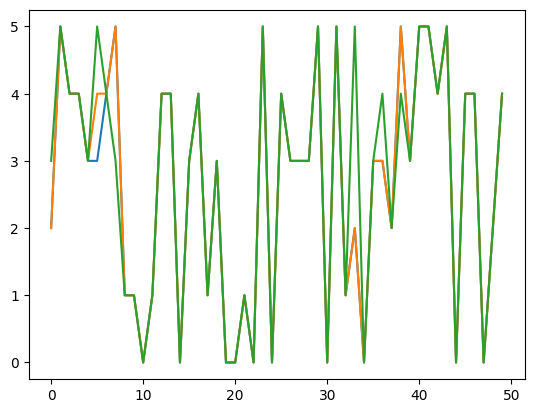

In [45]:
import matplotlib.pyplot as plt
plt.plot(single_spyct_preds[:50])
plt.plot(y_test_f1[:50])
plt.plot(vsp_preds[:50])

In [31]:
print(np.sum(np.abs(y_test-(vspyct_preds.mean(axis=1)>=0.5).to(torch.int32).numpy())),
np.sum(np.abs(y_test-np.array(single_spyct.predict(X_test)>=0.5).astype(int))))

TypeError: unsupported operand type(s) for -: 'bytes' and 'int'

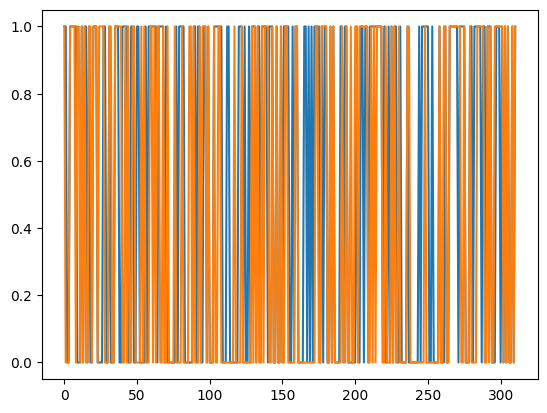

In [23]:
import matplotlib.pyplot as plt
plt.plot(y_test)
# plt.plot(ensemble_spyct.predict(X_test))
# plt.plot(single_spyct.predict(X_test))
# plt.plot(vspyct_preds.mean(axis=1), label='VSpyct')
plt.plot((vspyct_preds.mean(axis=1)>=0.5).to(torch.int32))

In [26]:
vspyct.num_nodes

23

In [54]:
i = 27

vspyct_preds[i], vspyct_preds[i].mean(), y_test[i], single_spyct.predict(X_test[i].reshape(1,-1))

(tensor([[0.7493],
         [0.7493],
         [1.0000],
         [0.8261],
         [0.8261],
         [1.0000],
         [0.8261],
         [1.0000],
         [1.0000],
         [0.7493],
         [0.7493],
         [0.7493],
         [0.7493],
         [1.0000],
         [0.7493],
         [0.7493],
         [0.7493],
         [0.7493],
         [0.7493],
         [0.8261],
         [1.0000],
         [0.8261],
         [1.0000],
         [0.8261],
         [1.0000],
         [0.7493],
         [0.7493],
         [1.0000],
         [0.7493],
         [0.8261]]),
 tensor(0.8424),
 array([1]),
 array([[0.9456521]], dtype=float32))

In [24]:
mean_absolute_error(y_test, vspyct_preds.mean(axis=1)),\
  mean_absolute_error(y_test, ensemble_spyct.predict(X_test)),\
    mean_absolute_error(y_test, single_spyct.predict(X_test))

(22992.244500411183, 19817.563270970393, 25378.024405496162)

In [25]:
mae_vspyct = mean_absolute_error(y_test, vspyct_preds.mean(axis=1))
mae_spyct_single = mean_absolute_error(y_test, single_spyct.predict(X_test))
mae_spyct_ensemble = mean_absolute_error(y_test, ensemble_spyct.predict(X_test))

In [26]:
import pickle

with open('../house_mae_vspyct.pcl', 'wb') as f:
  pickle.dump(mae_vspyct, f)

with open('../house_mae_spyct_single.pcl', 'wb') as f:
  pickle.dump(mae_spyct_single, f)

with open('../house_mae_spyct_ensemble.pcl', 'wb') as f:
  pickle.dump(mae_spyct_ensemble, f)